# Identifying Bias in AI

The activity is a programming exercise based on [identifying bias in AI](https://www.kaggle.com/code/alexisbcook/exercise-identifying-bias-in-ai/notebook), which was released under the Apache 2.0 open source licence. This adapation has been development in the context of the erasmus+ project [FAIAS](https://fosteringai.github.io/). 

In this exercise we will use labeled data to train a model to decide whether a comment or a text is toxic or not. We will explore how and why our trained model can be biased. All code that is necessary to complete the exercise has been added, but you are free to add more code and experiment. 

The easiest way to get started with this notebook is to open it in [Google Colab](https://colab.research.google.com/). This way you can run the code without any required setup on your machine. Of course, if you are familiar with Python and Jupyter Notebooks, you can install the necessary dependencies on your computer and run it there. If you are working with Google Colab, extra explanations will be given throughout the notebook. 

This notebooks contains several so called cells. These are the areas where you can write code. In this notebook all necessary code has already been added for you. To run a piece of code, you can click on "run cell" to the left of the code. The order in which you run the cells is important. For instance, in the very first cell, we are importing several packages. These are used in other cells. If you run the other cells first without having run the cells in which you import the packages, you will get an error message. Similarly, it is also important that you first upload the data to Google Colab before you can use it.

If you leave the notebook idle for too long (think hours), its runtime is automatically disconnected. In this case you will need to restart and run the cells again. 


## Prepare data and train model

### Importing all packages and load data

Before you can use this notebook you need to upload the data file *toxic_data.csv*. If you are using Google Colab, at the left-hand side of this screen, you go to *files* and then select *upload to session storage*. Note that you might have to wait until you are connected to a runtime before you can click on *upload to session storage*. 

It will take a while before the file has been uploaded completely. As long as the file is still uploading, you will see a progress ring at bottom of the file screen (with the name of the file next to it). 

Then, we need to import all packages that are needed to run the code in this notebook. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

By running the following cell, you make sure to obtain the same results each time you run the code in this notebook. If you do not run this cell, sampling might be done differently and results will be different.

In [2]:
np.random.seed(0)

We also need to load the data you have uploaded earlier. 

Verify that the name of the uploaded file coincides with the name in the following cell: eg if the file name is *toxic_data.csv*, then in the following cell you must have 

```data = pd.read_csv("toxic_data.csv", encoding="utf8")```

It is important to make sure that the file has been uploaded completely before running the following cell. As long as the file is still uploading, you will see a progress ring at bottom of the file screen (with the name of the file next to it). If you do run the cell while it is still being uploaded, you will get an error message. Rerun the cell when it is ready.

In [3]:
data = pd.read_csv("toxic_data.csv", encoding="utf8")

The variable `data` now refers to a pandas DataFrame. A DataFrame organizes data into a 2-dimensional table of rows and columns, intuitively, you can think of a DataFrame as a spreadsheet. In the next section we will explore the data a bit further.  

### Data exploration 

Before continuing, let us take a look at some properties of the data. The shape will tell us how many rows and columns the data contains:

In [4]:
# (number of rows, number of columns)
data.shape

(90902, 46)

The names of the columns present in the data can also easily be retrieved. Note that the list is rather large. If you want to hide it click on the cross (*clear output*).

In [ ]:
# column names
list(data.columns)

In this exercise we are going to work with two columns: `'comment_text'` and `'target'`. 

Let us look at the first rows. We can access the first rows by using the `head` method. You can change the parameter in order to retrieve more rows. 

In [6]:
data.head(2)

,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,0,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0000,0.021277,0.87234,0.0000,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
1,1,239607,0.912500,Yet call out all Muslims for the acts of a few...,0.050000,0.2375,0.612500,0.88750,0.1125,0.0,...,26670,approved,0,0,0,1,0,0.0,4,80


Since we are only interested in two specific columns, we filter the data, eg `data["target"]` contains the `"target"` column. `data["target"]` is not a DataFrame anymore but a Pandas Series which is a one-dimensional array. We can still look at the first rows by using the `head` method.

In [ ]:
data["comment_text"].head(2)

0                 haha you guys are a bunch of losers.
1    Yet call out all Muslims for the acts of a few...
Name: comment_text, dtype: object

All rows contain a index, this is like an identifier. In our case, the indices are a sequence of integers starting with 0. This is not always the case, e.g. you could split a DataFrame into two subsets and in one of the resulting DataFrames or Series the first row will not have index 0 anymore, but will have the index it had in the original DataFrame.

You look at the row at a specific index by using the `loc` property with takes the index as input.

In [ ]:
# comment with index 1
data["comment_text"].loc[1]

"Yet call out all Muslims for the acts of a few will get you pilloried.   So why is it okay to smear an entire religion over these few idiots?  Or is this because it's okay to bash Christian sects?"

In [7]:
# target of comment with index 1
data["target"].loc[1]


0.9125

The dataset is a subset of the data that was used in the Jigsaw Unintended Bias in Toxicity Classification competition. In the orginal dataset `"target"` is a number between 0 and 1, where closer to 1 means more toxic and closer to 0 less toxic. In the dataset we are using all rows with target between 0.3 and 0.7 have been filtered out. This means that comments with a target > 0.7 can be considered as toxic and comments with a target < 0.3 as non toxic. 

To visualize how many comments we have for each range of target values, you can run the following cell:

<Axes: >

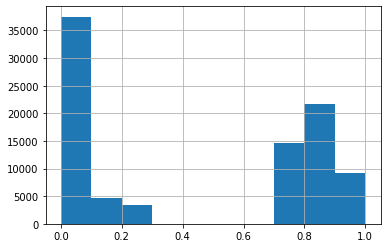

In [8]:
data["target"].hist(bins=10)

If you want to know how many rows have target more than 0.7, or less than 0.3, you can run the following two cells. You will see the data set is nicely divided into toxic (>0.7) and non-toxic (<0.3).

In [9]:
len(data[data["target"] > 0.7])

45451

In [10]:
len(data[data["target"] < 0.3])

45451

### Data preprocessing

We will transform the data such that it is easier to work with. We want to predict whether a comment is toxic or not, hence it is easier to work with 0/1 instead of a range of numbers between 0 and 1. To achieve this we will map each number < 0.3 to 0 (not toxic) and each number > 0.7 to 1 (toxic). We will save the resulting column in a variable called `target`:

In [11]:
target = (data["target"] > 0.7).astype(int)

The other column we are interested in, is the `"comment_text`" column. Let us save that column in a variable called `comment`. As before `comment` now refers to a Pandas Series.

In [12]:
comment = data["comment_text"]

In [13]:
type(comment)

pandas.core.series.Series

Let us take a look at the first rows:

In [14]:
comment.head(3)

0                 haha you guys are a bunch of losers.
1    Yet call out all Muslims for the acts of a few...
2    This bitch is nuts. Who would read a book by a...
Name: comment_text, dtype: object

In [15]:
target.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

Finally, we split the data into two subsets: a training set and a test set. In machine learning, you use training data to train a model. You then test it on examples that the model has not seen before, the examples in the test set. We will use the `train_test_split` method that we imported earlier. We add two optional parameters:
- `test_size` which we set to 0.3: this means that we split the original data into 70% training data and 30% test data
- `stratify` on target which means that the proportion of toxic/non toxic in training and test data will be the same as in the original data set

In [16]:
comment_train, comment_test, target_train, target_test = train_test_split(comment, target, test_size=0.3, stratify=target)

We have split the data up in training data and test data:
- training data consists of two columns `comment_train` and `target_train`
- test data consists of two columns `comment_test` and `target_test`

The 4 columns are Pandas Series. If you check the first rows of `comment_train` you will see that the index does not start with 0 anymore. This is because the original data was reshuffled and split.

In [17]:
comment_train.head(3)

56549    I thought the longliner's were all about local...
21515    Do you grow your own foods?  Hoard your own ca...
84940    "...they have also begun arresting people who ...
Name: comment_text, dtype: object

In [18]:
comment_train.loc[56549]

"I thought the longliner's were all about local labor, local Hawaiian's working the trade for local dollars and local consumption. Isn't that what they said when they got all them folks to stand up in opposition to the expansion of Papahanaumokuakea? I don't know about anyone else, but I feel as if Westpac has been hustling us all along."

In [19]:
target_train.loc[56549]

0

The stratify parameter makes sure that the training data is evenly split into toxic and not toxic, like the orginal data.

In [20]:
# number of toxic data in the training data
len(target_train[target_train == 1])

31816

In [21]:
# number of non-toxic data in the training data
len(target_train[target_train == 0])

31815

### Working with words and vocabularies

We want to map comments to targets (0 or 1). For that we need to add a bit of structure, we need a way to uniquely represent our comments. We will do this by creating a vocabulary using the training data. Every sentence (not necessarily present in the training data) can then be represented using this vocabulary: every sentence is converted to a vector of length size of the vocabulary.

We will use the earlier imported `CountVectorizer` to achieve this. See [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for more info.

In [22]:
# Learn a vocabulary from the training data
vectorizer = CountVectorizer()
vectorizer.fit(comment_train)

CountVectorizer()

Finally, we have to transform our comment data using this representation. 
- `X_train`: the comments from the training data
- `X_test`: the comments from the test data

In [23]:
X_train = vectorizer.transform(comment_train)
X_test = vectorizer.transform(comment_test)

### Train model

In our example, we will use logistic regression. A logistic model models the probability of an event taking place, here toxic or not toxic. This type of model is often used for classification. 

We will use the `LogisticRegression` model we imported earlier. More information can be found in [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

We will use the training data (`X_train` and `target_train`) to fit the model and then we will test its accuracy on the test data (`X_test` and `target_test`).


In [24]:
# fit training data
classifier = LogisticRegression(max_iter= 2000)
classifier.fit(X_train, target_train)

LogisticRegression(max_iter=2000)

In [25]:
classifier.score(X_test, target_test)

0.9297422170070772

Accuracy on the test data is very high! Almost 93% of the test examples were classified correctly.

Let's write a function we can reuse. This function takes one parameter (a comment) and uses the classifier to predict whether the comment is toxic and prints out whether that comment is toxic or not.

In [26]:
def classify_comment(comment):
  prediction = classifier.predict(vectorizer.transform([comment]))[0]
  if prediction == 0:
    print("NOT TOXIC", comment)
  else:
    print("TOXIC", comment)

After running the previous cell, you can now use the function `classify_comment` on any sentence you like. Just make sure they are between quotes, e.g. "I love cats." Python needs these quotes to know they are sentences (strings).

In [27]:
classify_comment("I love cats.")

NOT TOXIC I love cats.


In [28]:
classify_comment("I hate cats.")

NOT TOXIC I hate cats.


### How does the model make decisions?

What happens behind the scenes is that the model assigns to each word in the vocabulary a coefficient, where a higher coefficient denotes more toxic. In the next cell, let us print the 10 most toxic words in the vocabulary, together with their coefficient.

In [29]:
# get 10 most toxic words
coefficients = pd.DataFrame({"word":list(sorted(vectorizer.vocabulary_.keys())), "coeff": classifier.coef_[0]})
coefficients.sort_values(by=['coeff']).tail(10)

,word,coeff
25824,hypocrite,6.176646
34386,moron,6.288207
38522,pathetic,6.507094
16943,dumb,6.590523
12943,crap,6.602809
25985,idiotic,6.968227
50099,stupidity,7.565816
25993,idiots,8.628643
25982,idiot,8.634393
50086,stupid,9.609074


This seems to make sense. The words are clearly toxic.

## Deep dive

Let us compare the following 4 sentences:
- "I have a muslim friend"
- "I have a christian friend"
- "I have a white friend"
- "I have a black friend"

We will
- call `classify_comment` to print the prediction made by the model
- print the coefficients of the words in the sentence that are in the vocabulary

This will be grouped in the function `classify_and_describe`.

Feel free to try out more comments, to see how the model classifies them.


In [30]:
def classify_and_describe(comment):
  classify_comment(comment)
  print(coefficients[coefficients.word.isin(comment.split())])

In [31]:
comment_1 = "I have a muslim friend"
comment_2 = "I have a christian friend"
comment_3 = "I have a white friend"
comment_4 = "I have a black friend"

In [32]:
classify_and_describe(comment_1)

TOXIC I have a muslim friend
         word     coeff
21395  friend  0.047330
24195    have -0.072698
34872  muslim  1.866862


In [33]:
classify_and_describe(comment_2)

NOT TOXIC I have a christian friend
            word     coeff
10332  christian  0.213929
21395     friend  0.047330
24195       have -0.072698


In [34]:
classify_and_describe(comment_3)

NOT TOXIC I have a white friend
         word     coeff
21395  friend  0.047330
24195    have -0.072698
56818   white  1.271812


In [35]:
classify_and_describe(comment_4)

TOXIC I have a black friend
         word     coeff
6917    black  2.067671
21395  friend  0.047330
24195    have -0.072698


None of the 4 examples should have been marked as toxic. The model however classifies 2 of them as toxic. This is a sign of bias: the model seems to be in favor of *christian* and against *muslim*, and in favor of *white* and against *black*.



What happened here is called **identity term bias**.

Our model is biased towards indentity terms: terms characterizing a specific group of people such as "Muslim" and "black". This type of bias is commonly reflected in false positives: non-toxic comments with identity terms are incorrectly classified as toxic. This is due to the frequency with which some identity terms appear in toxic and attacking comments. 

As you have seen, language models are essentialy a probability distribution over words or sequences of words. They learn to correlate certain genders, races, ethnicities and religions with toxic words, because these toxic words over overrepresented in the texts. 

### Other possible types of biases

Many types of bias can arise. We will now look at some examples and hypothetical cases. This list is by far complete and primarily serves as an eye-opener.

#### Evaluation bias

Suppose you have trained the model with comments primarily from users based in Canada, i.e. you have used training and test data from Canadian users. Your model performs really well on the test data. Next, the model is used in Australia and it does not perform well at all, because of differences in English. 

Another typical example of evaluation bias is training a model to predict voting turnout across the country, but you have trained and evaluated it on local data.

#### Sample bias

This type of bias happens when the training data does not accurately represent the real world. For instance when the training data mostly contains comments from right wing supporters.

Another example: suppose you want to build a speech-to-text system. To do this you need a lot of audio, together with the transcriptions. A practical way to do this would be to use audiobooks. However, most audiobooks are narrated by educated, middle aged, white men. Systems trained on such data underperform on users of different ethnic or socio-economic background.

#### Annotation bias

The data we have used is annotated: each sentence had a label. The way these labels have been chosen can also lead to bias. In a study from the Allen Institute for AI, Carnegie Mellon and the University of Washington, researchers investigated how differences in dialect can lead to racial biases in automatic hate speech detection, see [The risk of Racial Bias in Hate Speech Detection](https://maartensap.com/pdfs/sap2019risk.pdf). They found that the people responsible for annotating the data are more likely to label phrases in the African American English (AAE) dialect more toxic than American English variants, despite the fact that these are considered not toxic by the AAE speakers.



